# COVID19-FLU DIAGNOSTIC DATASET/MODEL

## 3.1 BASE GRID SEARCH CODE

In [9]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV
import time
from sklearn.metrics import classification_report
import pandas as pd

In [7]:
def simple_grid_search(
X_train, y_train, X_test, y_test, feature_engineering_pipeline
):
    """
    Simple helper function to grid seach an ExtraTreesClassifier model and print out a classification report
    for the best model where best here is defined as having 
    the best cross-validated accuracy on the training set"""
    
    params = { # some simple parameters to grid search
        "max_depth": [10, None],
        "n_estimators": [10, 50, 100, 500],
        "criterion": ["gini", "entropy"],
    }
    base_model = ExtraTreesClassifier(random_state=42) # initialize the model
    model_grid_search = GridSearchCV( # initialize the grid search
        estimator=base_model, #  the model to grid search
        param_grid=params, # the parameters to grid search over
        cv=3,  # the number of folds to use for cross-validation
        n_jobs=-1,  # the number of jobs to run in parallel
        verbose=1)  # print out the progress of the grid search
    start_time = time.time() # start the timer
    # fit FE pipeline to training data and use it to transform test data
    if feature_engineering_pipeline:
        parsed_X_train = feature_engineering_pipeline.fit_transform(X_train)
        parsed_X_test = feature_engineering_pipeline.transform(X_test)
    else:
        parsed_X_train = X_train
        parsed_X_test = X_test
    parse_time = time.time() # stop the timer
    print("Parsed data in {:.2f} seconds".format(parse_time - start_time)) # print out the time it took to parse the data
    model_grid_search.fit(parsed_X_train, y_train) # fit the model to the parsed training data
    fit_time = time.time() # stop the timer
    print("Fitted model in {:.2f} seconds".format(fit_time - parse_time)) # print out the time it took to fit the model
    best_model =  model_grid_search.best_estimator_ # get the best model
    print(classification_report(y_true=y_test,
                                y_pred=best_model.predict(parsed_X_test))) # print out the classification report
    end_time = time.time() # stop the timer
    print("Total time: {:.2f} seconds".format(end_time - start_time)) # print out the time it took to run the script
    return best_model # return the best model|

In [40]:
covid_flu = pd.read_csv("./data/covid_flu.csv")
covid_flu.head()

,Diagnosis,InitialPCRDiagnosis,Age,Sex,neutrophil,serumLevelsOfWhiteBloodCell,lymphocytes,CReactiveProteinLevels,DurationOfIllness,CTscanResults,RiskFactors,GroundGlassOpacity,Diarrhea,Fever,Coughing,ShortnessOfBreath,SoreThroat,NauseaVomitting,Temperature,Fatigue
0,H1N1,NaN,67.0,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Yes,NaN,No,NaN,38.111111,No
1,H1N1,NaN,29.0,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,H1N1,NaN,22.0,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,H1N1,NaN,20.0,F,NaN,NaN,NaN,NaN,NaN,NaN,immuno,NaN,NaN,Yes,Yes,NaN,No,NaN,36.555556,Yes
4,H1N1,NaN,21.0,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# percent of missing data
covid_flu.isnull().mean() * 100 # percent of missing data

Diagnosis                       0.000000
InitialPCRDiagnosis            92.982456
Age                             1.889339
Sex                             5.128205
neutrophil                     93.049933
serumLevelsOfWhiteBloodCell    89.811066
lymphocytes                    89.473684
CReactiveProteinLevels         90.755735
DurationOfIllness              94.129555
CTscanResults                  89.271255
RiskFactors                    85.897436
GroundGlassOpacity             93.724696
Diarrhea                       69.635628
Fever                          37.719298
Coughing                       42.037787
ShortnessOfBreath              94.939271
SoreThroat                     54.790823
NauseaVomitting                71.592443
Temperature                    57.624831
Fatigue                        64.170040
dtype: float64

In [12]:
covid_flu.isnull().sum()* 100 / len(covid_flu) # number of missing data

Diagnosis                       0.000000
InitialPCRDiagnosis            92.982456
Age                             1.889339
Sex                             5.128205
neutrophil                     93.049933
serumLevelsOfWhiteBloodCell    89.811066
lymphocytes                    89.473684
CReactiveProteinLevels         90.755735
DurationOfIllness              94.129555
CTscanResults                  89.271255
RiskFactors                    85.897436
GroundGlassOpacity             93.724696
Diarrhea                       69.635628
Fever                          37.719298
Coughing                       42.037787
ShortnessOfBreath              94.939271
SoreThroat                     54.790823
NauseaVomitting                71.592443
Temperature                    57.624831
Fatigue                        64.170040
dtype: float64

In [14]:
# columns
covid_flu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482 entries, 0 to 1481
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Diagnosis                    1482 non-null   object 
 1   InitialPCRDiagnosis          104 non-null    object 
 2   Age                          1454 non-null   float64
 3   Sex                          1406 non-null   object 
 4   neutrophil                   103 non-null    float64
 5   serumLevelsOfWhiteBloodCell  151 non-null    float64
 6   lymphocytes                  156 non-null    float64
 7   CReactiveProteinLevels       137 non-null    object 
 8   DurationOfIllness            87 non-null     float64
 9   CTscanResults                159 non-null    object 
 10  RiskFactors                  209 non-null    object 
 11  GroundGlassOpacity           93 non-null     object 
 12  Diarrhea                     450 non-null    object 
 13  Fever             

In [16]:
# categories of diagnosis
covid_flu.Diagnosis.value_counts(normalize=True) * 100 # percent of each category

Diagnosis
H1N1       72.334683
COVID19    27.665317
Name: proportion, dtype: float64

### Imputing missing values for quanititative variables

In [17]:
numeric_types = ['float16', 'float32', 'float64', 'int16', 'int32', 'int64'] # numeric types
numerical_columns = covid_flu.select_dtypes(include=numeric_types).columns.tolist() # select numerical columns
numerical_columns

['Age',
 'neutrophil',
 'serumLevelsOfWhiteBloodCell',
 'lymphocytes',
 'DurationOfIllness',
 'Temperature']

We can make use of the SimpleImputer class to fill most of the missing values we have.

In [18]:
from sklearn.impute  import SimpleImputer # import the imputer
num_impute  = SimpleImputer(strategy="mean") # initialize the imputer

In [19]:
# before the imputer
covid_flu[numerical_columns].head() # print out the first 5 rows of the numerical columns

,Age,neutrophil,serumLevelsOfWhiteBloodCell,lymphocytes,DurationOfIllness,Temperature
0,67.0,NaN,NaN,NaN,NaN,38.111111
1,29.0,NaN,NaN,NaN,NaN,NaN
2,22.0,NaN,NaN,NaN,NaN,NaN
3,20.0,NaN,NaN,NaN,NaN,36.555556
4,21.0,NaN,NaN,NaN,NaN,NaN


In [20]:
# mean before  the imputer
covid_flu[numerical_columns].mean() # print out the mean of the numerical columns

Age                            26.471040
neutrophil                      6.854078
serumLevelsOfWhiteBloodCell     6.885159
lymphocytes                     1.850154
DurationOfIllness              13.988506
Temperature                    38.068312
dtype: float64

In [21]:
# replace with mean
covid_flu[numerical_columns] = num_impute.fit_transform(covid_flu[numerical_columns]) # replace with mean
covid_flu[numerical_columns].head() # print out the first 5 rows of the numerical columns

/Users/joelorellana/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/joelorellana/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/joelorellana/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/joelorellana/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated

,Age,neutrophil,serumLevelsOfWhiteBloodCell,lymphocytes,DurationOfIllness,Temperature
0,67.0,6.854078,6.885159,1.850154,13.988506,38.111111
1,29.0,6.854078,6.885159,1.850154,13.988506,38.068312
2,22.0,6.854078,6.885159,1.850154,13.988506,38.068312
3,20.0,6.854078,6.885159,1.850154,13.988506,36.555556
4,21.0,6.854078,6.885159,1.850154,13.988506,38.068312


### END-OF-TAIL IMPUTATION
For normally distributed or skewed data

<Axes: title={'center': 'Histogram of Lymphocytes'}, xlabel='cells/uL', ylabel='Frequency'>

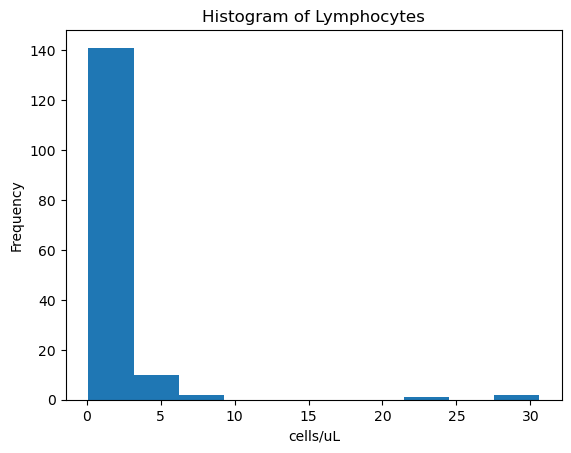

In [24]:
# looking at the original histogram for lymphocytes
covid_flu.lymphocytes.plot(
title="Histogram of Lymphocytes", # title of the plot
xlabel='cells/uL',
kind="hist") # type of plot

<Axes: title={'center': 'Histogram of Lymphocytes'}, xlabel='cells/uL', ylabel='Frequency'>

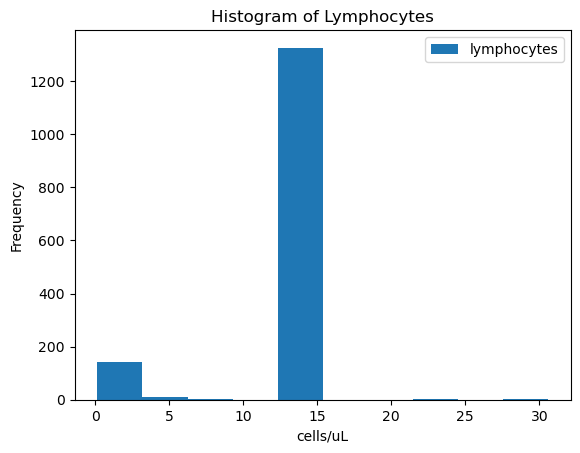

In [28]:
# IMPORT OUR END-OF-TAIL IMPUTER
from feature_engine.imputation import EndTailImputer
EndTailImputer().fit_transform(covid_flu[["lymphocytes"]]).plot(
title="Histogram of Lymphocytes", # title of the plot
xlabel='cells/uL',
kind="hist") # type of plot

In [29]:
8.34 + 2.35 * 3

15.39

### IMPUTING MISSING QUALITATIVE DATA

In [35]:
categorical_types =  ['O'] # categorical types
categorical_columns = covid_flu.select_dtypes(include=categorical_types).columns.tolist() # select categorical columns
categorical_columns

['Diagnosis',
 'InitialPCRDiagnosis',
 'Sex',
 'CReactiveProteinLevels',
 'CTscanResults',
 'RiskFactors',
 'GroundGlassOpacity',
 'Diarrhea',
 'Fever',
 'Coughing',
 'ShortnessOfBreath',
 'SoreThroat',
 'NauseaVomitting',
 'Fatigue']

In [36]:
categorical_columns.remove('Diagnosis') # remove the diagnosis column because it is not a feature in our ML model

In [37]:
for column in  categorical_columns: # loop over the categorical columns
    print(covid_flu[column].value_counts(dropna=False)) # print out the value counts for the column
    print() # print out a blank line

InitialPCRDiagnosis
NaN    1378
Yes     100
No        4
Name: count, dtype: int64

Sex
M      748
F      658
NaN     76
Name: count, dtype: int64

CReactiveProteinLevels
NaN           1345
8                3
0.5              3
15               3
111              2
              ... 
5.78             1
67.62            1
13.2 mg/dL       1
21.27            1
0.6              1
Name: count, Length: 121, dtype: int64

CTscanResults
NaN    1323
Yes     144
No       15
Name: count, dtype: int64

RiskFactors
NaN                                                                   1273
asthma                                                                  36
pneumonia                                                               21
immuno                                                                  21
diabetes                                                                16
                                                                      ... 
diabetes, Hypertension                    

In [41]:
# Feature Improvement
covid_flu.Sex = covid_flu.Sex.map({"M": True, "F": False}) # map the sex column to 1 for male and 0 for female
covid_flu.Sex[0:5] # print out the first 5 rows of the sex column

0    False
1     True
2    False
3    False
4     True
Name: Sex, dtype: object

### 1. MOST-FREQUENT VALUE IMPUTATION

In [42]:
cat_impute = SimpleImputer(strategy="most_frequent") # initialize the imputer
covid_flu.Coughing.head()

0    Yes
1    NaN
2    NaN
3    Yes
4    NaN
Name: Coughing, dtype: object

In [44]:
cat_impute.fit_transform(covid_flu[["Coughing"]])

/Users/joelorellana/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/joelorellana/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/joelorellana/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/joelorellana/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated

array([['Yes'],
       ['Yes'],
       ['Yes'],
       ...,
       ['Yes'],
       ['Yes'],
       ['Yes']], dtype=object)

### 2. ARBITRARY CATEGORY IMPUTATION